In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline


In [2]:
df= sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
cols_to_drop = ['who','adult_male','deck','embark_town','alive','alone']
df = df.drop(cols_to_drop, axis=1)

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second
887,1,1,female,19.0,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,26.0,0,0,30.0000,C,First


<AxesSubplot:>

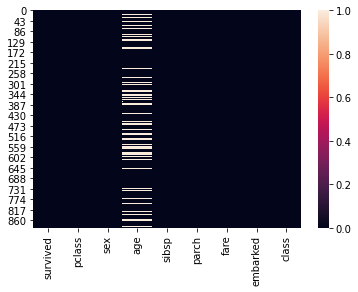

In [7]:
sns.heatmap(df.isnull())

In [8]:
# replace missing values with interpolated values 
df['age'] = df['age'].interpolate()

<AxesSubplot:>

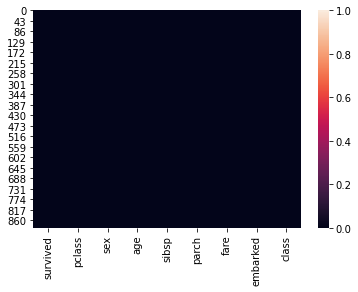

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       891 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   class     891 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.8+ KB


In [11]:
cols_to_drop = ['class']
df = df.drop(cols_to_drop, axis=1)

In [12]:
# convert categorical columns to binary 
# to do that create dummy columns for that you have to convert concatenate with the dataframe, then drop existinc columns
embarkedcolumndummy = pd.get_dummies(df['embarked'])
sexcolumndummy = pd.get_dummies(df['sex'])

In [13]:
df = pd.concat((df,embarkedcolumndummy,sexcolumndummy),axis=1)

In [14]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,C,Q,S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1
5,0,3,male,44.5,0,0,8.4583,Q,0,1,0,0,1
6,0,1,male,54.0,0,0,51.8625,S,0,0,1,0,1
7,0,3,male,2.0,3,1,21.0750,S,0,0,1,0,1
8,1,3,female,27.0,0,2,11.1333,S,0,0,1,1,0
9,1,2,female,14.0,1,0,30.0708,C,1,0,0,1,0


In [15]:
# drop the redundant columns thus converted
df = df.drop(['sex','embarked'],axis=1)

In [16]:
df.head(10)

,survived,pclass,age,sibsp,parch,fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
5,0,3,44.5,0,0,8.4583,0,1,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,1,0,1
7,0,3,2.0,3,1,21.0750,0,0,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1,1,0
9,1,2,14.0,1,0,30.0708,1,0,0,1,0


In [17]:
#seperate dataframe int x and y values 
x = df.values
y = df['survived'].values

In [18]:
# delete survived colums from x 
x= np.delete(x,0,axis=1)

In [19]:
df

,survived,pclass,age,sibsp,parch,fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,22.5,1,2,23.4500,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1


Split the Dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
# Buid Decision tree classifier
from sklearn import tree 
df_clf =tree.DecisionTreeClassifier(max_depth=5) #build
df_clf.fit(x_train, y_train) #train

df_clf.score(x_test,y_test) # make prediction
y_pred = df_clf.predict(x_test)
df_clf.score(x_test,y_test)

0.8022388059701493

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[141,  27],
       [ 26,  74]], dtype=int64)

In [23]:
# build randomForest classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test,y_test)


0.7985074626865671

In [24]:
# build gradient boosting classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test,y_test)

0.832089552238806

In [25]:
# naive bayes classifier 
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nb_clf.score(x_test,y_test)

0.7873134328358209

In [26]:
#K-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_test,y_test)

0.6940298507462687

In [27]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test,y_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8022388059701493

In [28]:
# SVM classifier 
from sklearn.svm import SVC
sv_clf = SVC(probability = True)
sv_clf.fit(x_train, y_train)
sv_clf.score(x_test,y_test)

0.7164179104477612